# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

In [47]:
from pathlib import Path

import pandas as pd
import numpy as np
import plotly.express as px
from plotly.graph_objects import Figure
from rich.jupyter import print
from rich.table import Table
from pylatexenc.latex2text import LatexNodes2Text

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [48]:
DATA_PATH = "Advertising.csv"

DATA_PATH = Path(DATA_PATH)
assert DATA_PATH.exists()

advertising_df = pd.read_csv(DATA_PATH)
advertising_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [49]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [50]:
predictors = advertising_df[['TV', 'radio', 'newspaper']].values
target = advertising_df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [51]:
predictors_with_bias = np.hstack([np.ones(predictors.shape[0]).reshape(-1, 1), predictors])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [52]:
normalized_predictors = predictors_with_bias / np.sqrt(np.sum(np.square(predictors_with_bias), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [53]:
# Реализация координатного спуска
latex_to_text = LatexNodes2Text().latex_to_text

number_of_iterations = 10 ** 3

omega = np.zeros(normalized_predictors.shape[1])

for iteration in range(number_of_iterations):
    r = target - normalized_predictors.dot(omega)
    for j in range(len(omega)):
        r += normalized_predictors[:, j] * omega[j]
        omega[j] = normalized_predictors[:, j].dot(r)
        r -= normalized_predictors[:, j] * omega[j]
 

table = Table(title="Коэффициенты Линейной Регрессии (Реализация координатного спуска)")
table.add_column(latex_to_text(r"\Omega"), justify="center", style="cyan", no_wrap=True)
table.add_column("Значение", justify="center")

for i, w in enumerate(omega):
    table.add_row(latex_to_text(fr"\omega_{{{i}}}"), f"{w:.4f}")

print(table)

   Коэффициенты   
Линейной Регрессии
   (Реализация    
  координатного   
     спуска)      
┏━━━━━┳━━━━━━━━━━┓
┃  Ω  ┃ Значение ┃
┡━━━━━╇━━━━━━━━━━┩
│ ω_0 │ 41.5622  │
│ ω_1 │ 110.1314 │
│ ω_2 │ 73.5286  │
│ ω_3 │ -0.5501  │
└─────┴──────────┘

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [54]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(normalized_predictors, target)
 
table = Table(title="Коэффициенты Линейной Регрессии (sklearn)")
table.add_column(latex_to_text(r"\Omega"), justify="center", style="cyan", no_wrap=True)
table.add_column("Значение", justify="center")

for i, w in enumerate(model.coef_):
    table.add_row(latex_to_text(fr"\omega_{{{i}}}"), f"{w:.4f}")

print(table)

   Коэффициенты   
Линейной Регрессии
    (sklearn)     
┏━━━━━┳━━━━━━━━━━┓
┃  Ω  ┃ Значение ┃
┡━━━━━╇━━━━━━━━━━┩
│ ω_0 │ 41.5622  │
│ ω_1 │ 110.1314 │
│ ω_2 │ 73.5286  │
│ ω_3 │ -0.5501  │
└─────┴──────────┘

Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [55]:
predictors_scalable = (predictors - predictors.mean(axis=0)) / predictors.std(axis=0)

**Добавим единичный столбец**

In [56]:
predictors_scalable_with_bias = np.hstack([np.ones(predictors_scalable.shape[0]).reshape(-1, 1), predictors_scalable])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [57]:
def mse_error(real_values: np.ndarray, predictive_values: np.ndarray) -> float:
    return np.mean((real_values - predictive_values) ** 2)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [58]:
mean_prediction = np.mean(target)
mse = mse_error(target, mean_prediction)
print(f"Среднеквадратичная ошибка для наивного прогноза: {mse:.4f}")

Среднеквадратичная ошибка для наивного прогноза: 27.0857

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [59]:
def lin_pred(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    return X.dot(w)


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

In [60]:
def stoch_grad_step(
    X: np.ndarray,
    y: np.ndarray,
    w: np.ndarray,
    train_ind: int,
    eta: float,
) -> np.ndarray:
    predictors_row, target_row = X[train_ind], y[train_ind]
    forecast = lin_pred(X=predictors_row, w=w)
    gradient = 2 * lin_pred(X=predictors_row.T, w=forecast - target_row)
    
    return w - eta * gradient

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [61]:
from dataclasses import dataclass


@dataclass(frozen=True, kw_only=True, slots=True)
class SGDResponse:
    omegas: np.ndarray
    mse: list[float]
    
    def __str__(self):
        return f"omegas: {self.omegas}\nmse: {self.mse[-1]:.4f}"
    
    __repr__ = __str__


def stochastic_gradient_descent(
    *,
    predictors: np.ndarray,
    target: np.ndarray,
    omegas: np.ndarray | None = None,
    tolerance: float = 10 ** -4,
    learning_rate: float = 5.5 * 10 ** 2,
    max_iterations: int = 10 ** 6,
) -> SGDResponse:
    sample_size = len(predictors)
    number_features = predictors.shape[1]
    omegas = omegas if omegas is not None else np.zeros(number_features)
    
    mse = []
    for _ in range(max_iterations):
    
        random_index = np.random.randint(sample_size)
        
        eta = learning_rate / sample_size
        new_omegas = stoch_grad_step(
            X=predictors,
            y=target,
            w=omegas,
            train_ind=random_index,
            eta=eta,
        )
        
        if np.linalg.norm(new_omegas - omegas) < tolerance:
            break
        
        omegas = new_omegas
        mse.append(
            mse_error(
                real_values=target, 
                predictive_values=lin_pred(X=predictors, w=omegas),
            ),
        )
    
    return SGDResponse(
        omegas=omegas,
        mse=mse,
    )

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [62]:
response = stochastic_gradient_descent(
    predictors=predictors_scalable_with_bias, 
    target=target,
    max_iterations=10 ** 5,
    learning_rate=6 * 10 ** -1,
    tolerance=10 ** -5,
    omegas=np.ones(predictors_scalable_with_bias.shape[1]) * 10 ** 10,
)

response

omegas: [14.1586974   3.94752726  2.85651323 -0.17392886]
mse: 2.8234

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

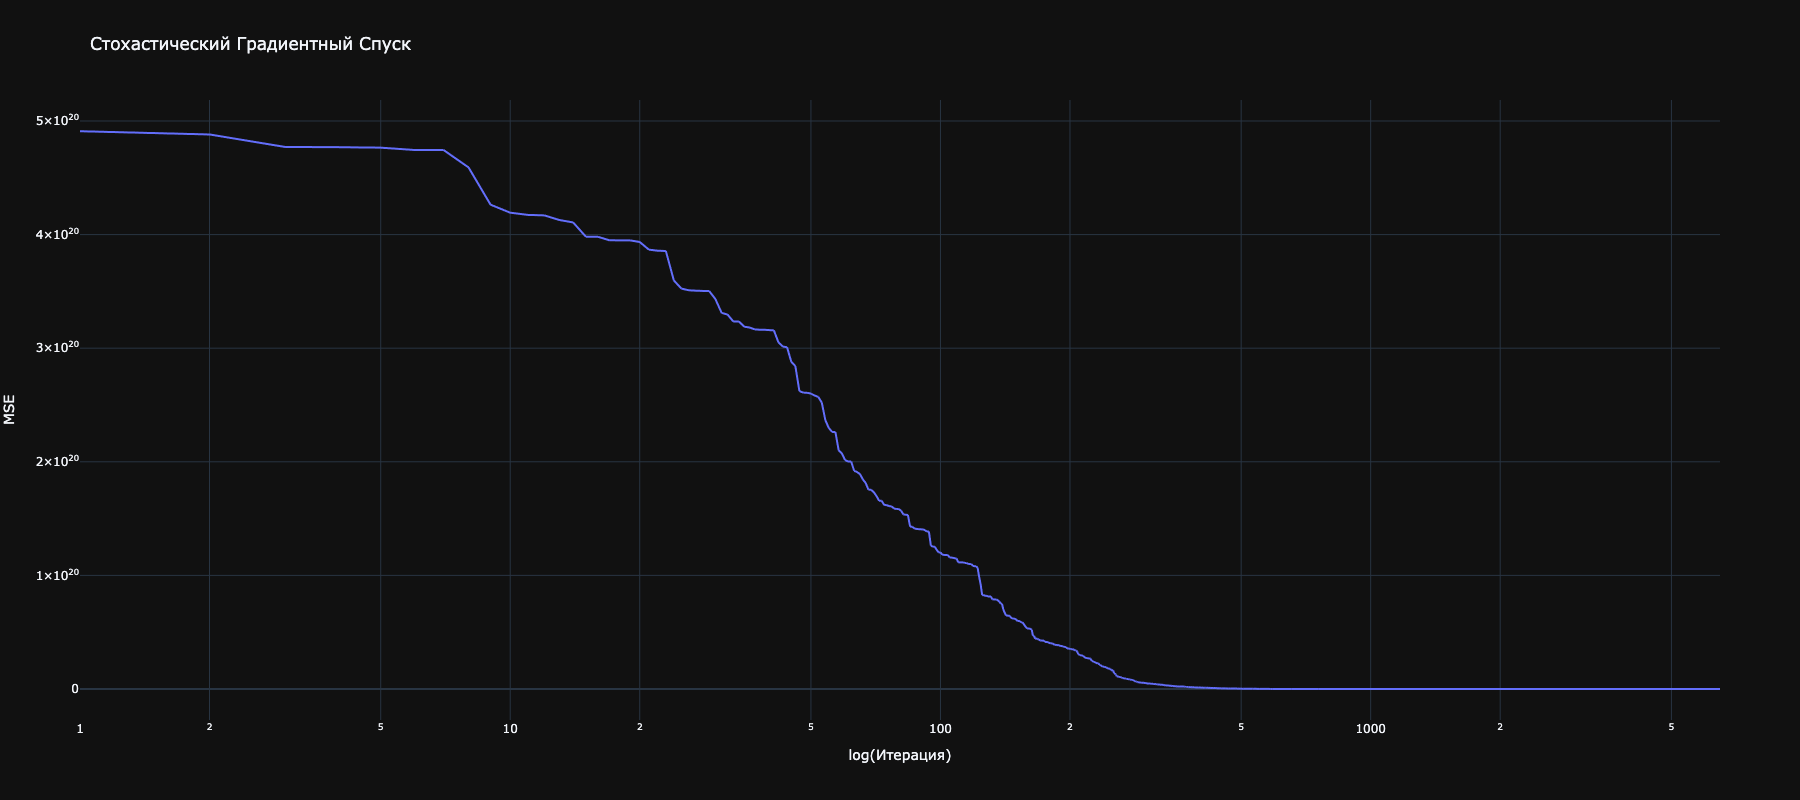

In [68]:
def create_mse_fig(mse: list[float]) -> Figure:
    fig = px.line(
        x=range(len(mse)), 
        y=mse, 
        title="Стохастический Градиентный Спуск", 
        log_x=True,
    )
    fig.update_layout(
        xaxis_title="log(Итерация)",
        yaxis_title="MSE",
    )
    
    return fig

mse_fig = create_mse_fig(mse=response.mse)
mse_fig.update_layout(
    autosize=False,
    width=1800,
    height=800,
)
mse_fig.show("png")

**Выведите вектор весов, к которому сошелся метод.**

In [64]:
print("Вектор весов к которому сошелся метод:", response.omegas)

Вектор весов к которому сошелся метод: [14.1586974   3.94752726  2.85651323 -0.17392886]

**Выведите среднеквадратичную ошибку на последней итерации.**

In [65]:
print("Среднеквадратичная ошибка на последней итерации:", response.mse[-1])

Среднеквадратичная ошибка на последней итерации: 2.8233530141279237